In [6]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# customize scatter plot from 12_Trending_Skills.ipynb

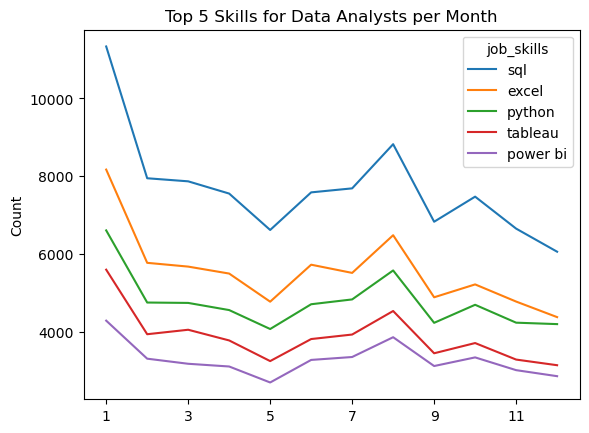

In [7]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_num'] = df_DA['job_posted_date'].dt.month
# explode job skills

df_DA_exploded = df_DA.explode('job_skills')

# create a pivot table
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_num', columns='job_skills',aggfunc='size', fill_value=0)

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

# sort in desc for top skill counts
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

# drop total row
df_DA_pivot = df_DA_pivot.drop('Total')

'''
# plot top 5 columns and all rows
df_DA_pivot.iloc[:, :5].plot(kind='line')

# chart cleanup
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()
'''

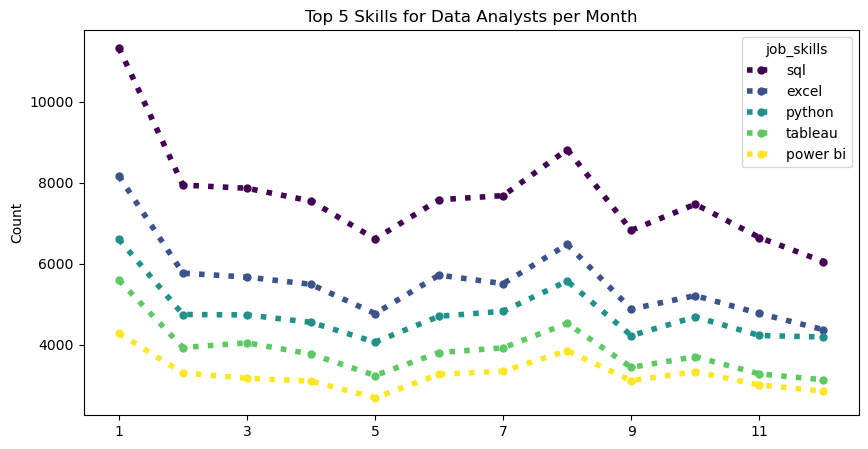

In [21]:
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options: '-', '--', '-.',':'
    colormap='viridis', #options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', #options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4',....
    markersize=5,
    figsize=(10,5)
)
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# customize scatter plot from 15_Matplotlib_Scatter_plots.ipynb

In [23]:
# explode the job_skills into individual rows
df_exploded = df.explode('job_skills')

# calculate the average salary and count of job postings per skill
skill_sats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

# limit to the top skills
skill_count = 20
skill_sats = skill_sats.sort_values(by='skill_count', ascending=False).head(skill_count) 
skill_sats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


In [24]:
from adjustText import adjust_text

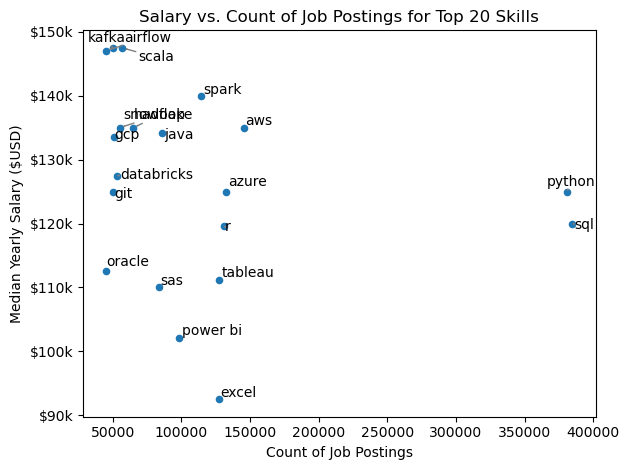

In [42]:
skill_sats.plot(kind='scatter',x='skill_count',y='median_salary')

# empty list to collect x and y values and label names in the for loop below
texts = []
# create a loop to find skill location (x,y)
for i, txt in enumerate(skill_sats.index):
    texts.append(plt.text(skill_sats['skill_count'].iloc[i],skill_sats['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
# set axis labels, title and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

# Job Postings Trend for Cloud Engineers

In [45]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

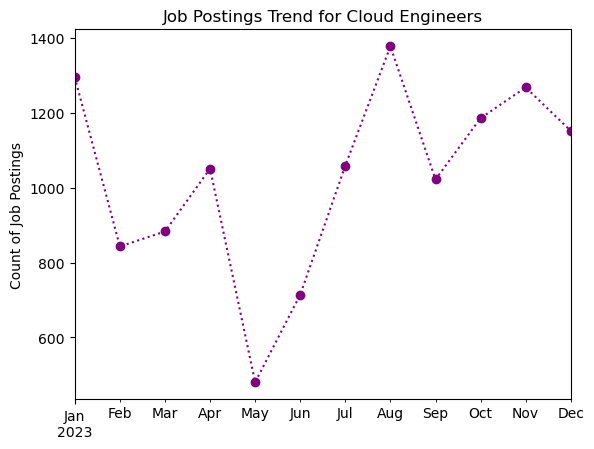

In [54]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()

monthly_job_postings.plot(
    kind='line',
    linestyle=':',
    color='purple',
    marker='o'
)

plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

# Customize Bar Chart

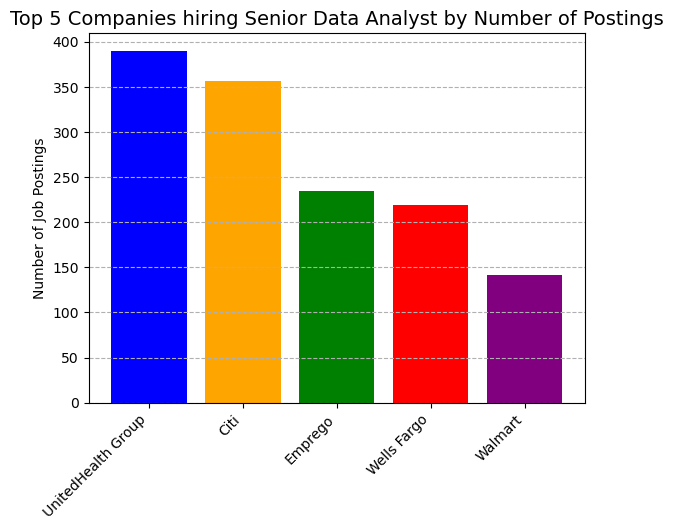

In [80]:
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] =df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# top 5 companies by number of postings
postings = SDA_df['company_name'].value_counts().head(5)

# custome colors
colors = ['blue','orange','green', 'red','purple']
# plotting
plt.bar(postings.index, postings.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analyst by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y',linestyle='--')
plt.show()